<a href="https://colab.research.google.com/github/mehdi-lamrani/tensor-flow/blob/main/Brain_Tumor_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Brain-tumor-classification-using-CNN**

- The main aim of this project is to use the CNN model and then classify whether a particular MRI scan has a tumor or not.

# Importing the libraries

In [21]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

# Part 1 - Data Preprocessing

 Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [3]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATA_tumeur/train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 202 images belonging to 2 classes.


Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [5]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATA_tumeur/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 51 images belonging to 2 classes.


# **Part 2 - Building the CNN**


# Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5- Dropout 

In [12]:
cnn.add(tf.keras.layers.Dropout(0.6))

# Step 6 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## **Part 3 - Training the CNN**

# Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set

In [15]:
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
7/7 [==============================] - 5s 219ms/step - loss: 0.6787 - accuracy: 0.5545 - val_loss: 0.6231 - val_accuracy: 0.8431
Epoch 2/10
7/7 [==============================] - 1s 188ms/step - loss: 0.6000 - accuracy: 0.6782 - val_loss: 0.6059 - val_accuracy: 0.6078
Epoch 3/10
7/7 [==============================] - 1s 167ms/step - loss: 0.6251 - accuracy: 0.6683 - val_loss: 0.5637 - val_accuracy: 0.8627
Epoch 4/10
7/7 [==============================] - 1s 174ms/step - loss: 0.5924 - accuracy: 0.6881 - val_loss: 0.5485 - val_accuracy: 0.7843
Epoch 5/10
7/7 [==============================] - 1s 168ms/step - loss: 0.5788 - accuracy: 0.7178 - val_loss: 0.4846 - val_accuracy: 0.8235
Epoch 6/10
7/7 [==============================] - 1s 174ms/step - loss: 0.5733 - accuracy: 0.6980 - val_loss: 0.4748 - val_accuracy: 0.8431
Epoch 7/10
7/7 [==============================] - 1s 184ms/step - loss: 0.5620 - accuracy: 0.7129 - val_loss: 0.4854 - val_accuracy: 0.8039
Epoch 8/10
7/7 [====

In [16]:
metrics_df = pd.DataFrame(history.history)

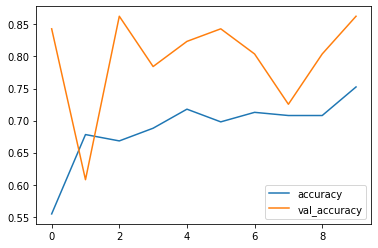

In [17]:
metrics_df[["accuracy","val_accuracy"]].plot()

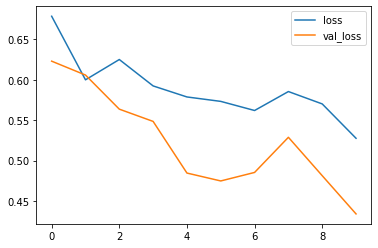

In [18]:
metrics_df[["loss","val_loss"]].plot()
